# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [47]:
#your code here
import requests
from io import StringIO
import zipfile

In [55]:
url = "http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip"
r= requests.get(url).content


In [63]:
from io import BytesIO
s = BytesIO(r)
zf = zipfile.ZipFile(s,'r')

In [66]:
zf.namelist()

['SchoolsPlayers.csv',
 'SeriesPost.csv',
 'Teams.csv',
 'TeamsFranchises.csv',
 'TeamsHalf.csv',
 'AllstarFull.csv',
 'Appearances.csv',
 'AwardsManagers.csv',
 'AwardsPlayers.csv',
 'AwardsShareManagers.csv',
 'AwardsSharePlayers.csv',
 'Batting.csv',
 'BattingPost.csv',
 'Fielding.csv',
 'FieldingOF.csv',
 'FieldingPost.csv',
 'HallOfFame.csv',
 'Managers.csv',
 'ManagersHalf.csv',
 'Master.csv',
 'Pitching.csv',
 'PitchingPost.csv',
 'readme2013.txt',
 'Salaries.csv',
 'Schools.csv']

In [68]:
csv_list = zf.namelist()
csv_list[csv_list.index('Salaries.csv')]

'Salaries.csv'

In [289]:
Salaries = pd.read_csv(zf.open(csv_list[csv_list.index('Salaries.csv')]))
Salaries =Salaries[['yearID','teamID','salary']]
Salaries.head()

,yearID,teamID,salary
0,1985,BAL,1472819
1,1985,BAL,1090000
2,1985,BAL,800000
3,1985,BAL,725000
4,1985,BAL,641667


In [242]:
Teams= pd.read_csv(zf.open(csv_list[csv_list.index('Teams.csv')]))
Teams = Teams[['yearID','teamID','W']]
Teams.head()

,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [299]:
totalsal=Salaries.groupby([Salaries.yearID,Salaries.teamID],as_index=False).sum()

In [301]:
totalsal.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [304]:
joined = pd.merge(totalsal, Teams, how="inner", on=['yearID', 'teamID'])
joined.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

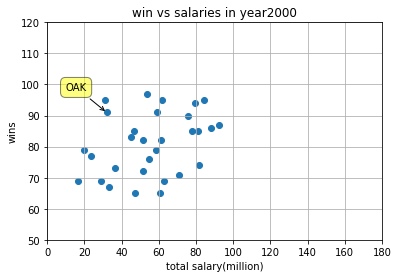

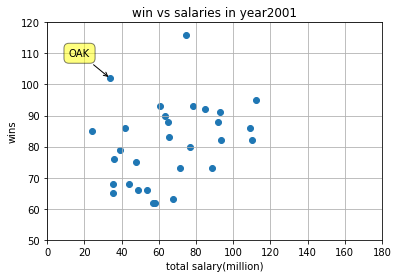

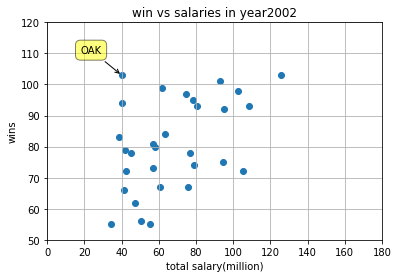

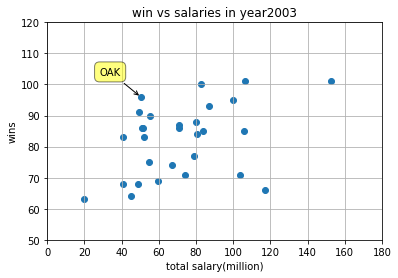

In [318]:
#your code here
team ='OAK'
years = np.arange(2000,2004)

for year in years:
    df = joined[joined.yearID==year]
    plt.scatter(df.salary/1e6,df.W)
    plt.title('win vs salaries in year'+str(year))
    plt.xlabel('total salary(million)')
    plt.ylabel('wins')
    plt.xlim(0,180)
    plt.ylim(50,120)
    plt.grid()   
    plt.annotate(team,
                xy=(df.salary[df.teamID==team]/1e6,df.W[df.teamID==team]),
                xytext=(-20,20),textcoords='offset points',ha='right',va='bottom',
                bbox=dict(boxstyle='round,pad=0.5',fc='yellow',alpha=0.5),
                arrowprops=dict(arrowstyle='->',facecolor='black',connectionstyle='arc3,rad=0'))
    plt.show()



#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

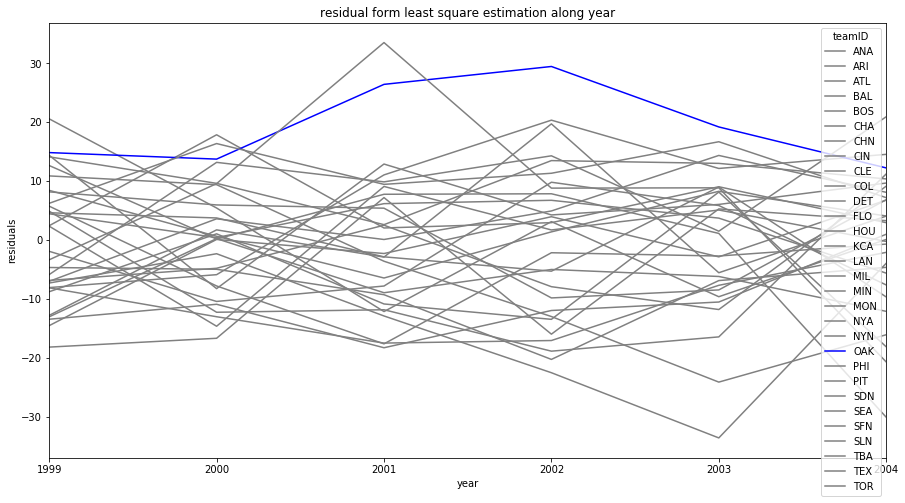

In [327]:
#your code here
team = 'OAK'
years = np.arange(1999,2005)
residuals = pd.DataFrame()
for year in years:
    df =joined[joined.yearID==year]
    x_list =df.salary.values/1e6
    y_list = df.W.values
    
    A=np.array([x_list,np.ones(len(x_list))])
    y=y_list
    w=np.linalg.lstsq(A.T,y)[0]
    yhat=(w[0]*x_list+w[1])
    residuals[year]=y-yhat
residuals.index=df.teamID
residuals=residuals.T
residuals.index =residuals.index.format()

residuals.plot(title='residual form least square estimation along year', figsize=(15,8),
              color =map(lambda x:'blue' if x == team else 'gray',df.teamID))
plt.xlabel('year')
plt.ylabel('residuals')
plt.show()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


oakland baskball team palyer get small salary but get a good 
result in 2001-2003,

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [87]:
#your code here
countries=pd.read_csv('../2014_data/countries.csv')
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
Country    194 non-null object
Region     194 non-null object
dtypes: object(2)
memory usage: 3.1+ KB


In [88]:
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [234]:
#your code here
income = pd.read_excel('../2014_data/indicator gapminder gdp_per_capita_ppp.xlsx',index_col='GDP per capita')

In [236]:
income.info()
income.head()
#income.set_index('GDP per capita')

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, Abkhazia to nan
Columns: 216 entries, 1800 to 2015
dtypes: float64(216)
memory usage: 444.2+ KB


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
GDP per capita,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [403]:
income1=pd.DataFrame(income.T)

In [404]:
income1.columns.name='year'

In [405]:
income1.head()

year,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
year,,,,,,,,,,,,,,,,,,,,,
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [240]:
income1=income1.fillna(0)
income1.head()

year,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,0.0,603.0,0.0,667.0,716.0,0.0,1197.0,618.0,0.0,757.0,...,0.0,0.0,877.0,0.0,663.0,869.0,0.0,507.0,0.0,0.0
1801,0.0,603.0,0.0,667.0,716.0,0.0,1199.0,620.0,0.0,757.0,...,0.0,0.0,879.0,0.0,665.0,870.0,0.0,507.0,0.0,0.0
1802,0.0,603.0,0.0,668.0,717.0,0.0,1201.0,623.0,0.0,757.0,...,0.0,0.0,882.0,0.0,667.0,871.0,0.0,507.0,0.0,0.0
1803,0.0,603.0,0.0,668.0,718.0,0.0,1204.0,626.0,0.0,757.0,...,0.0,0.0,884.0,0.0,668.0,872.0,0.0,507.0,0.0,0.0
1804,0.0,603.0,0.0,668.0,719.0,0.0,1206.0,628.0,0.0,757.0,...,0.0,0.0,887.0,0.0,670.0,873.0,0.0,508.0,0.0,0.0


In [406]:
income1[income1.index==2000]

year,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,962.0,NaN,5305.0,9885.0,NaN,31662.0,3387.0,NaN,19319.0,...,NaN,NaN,4017.0,NaN,2202.0,2521.0,NaN,2684.0,NaN,NaN


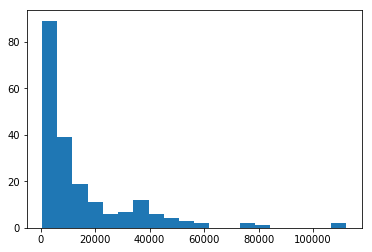

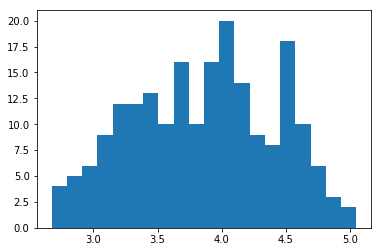

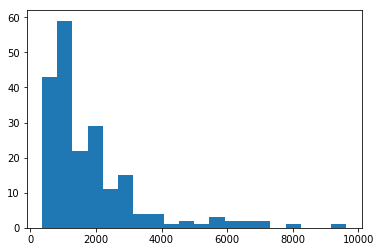

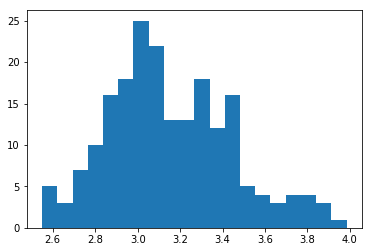

In [407]:
#your code here
years = [2000,1900]

for year in years:
    plt.plot(subplots=True)
    #income1[income1.index==year].iloc[:,0:10].plot(kind='bar')
    plt.hist(income1.loc[year].dropna().values,bins=20)
    plt.show()
    plt.hist(np.log10(income1.loc[year].dropna().values),bins=20)
    plt.show()

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [259]:
income1.columns.name='Country'
income1.index.name='year'

In [261]:
income1.head()

Country,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
year,,,,,,,,,,,,,,,,,,,,,
1800,0.0,603.0,0.0,667.0,716.0,0.0,1197.0,618.0,0.0,757.0,...,0.0,0.0,877.0,0.0,663.0,869.0,0.0,507.0,0.0,0.0
1801,0.0,603.0,0.0,667.0,716.0,0.0,1199.0,620.0,0.0,757.0,...,0.0,0.0,879.0,0.0,665.0,870.0,0.0,507.0,0.0,0.0
1802,0.0,603.0,0.0,668.0,717.0,0.0,1201.0,623.0,0.0,757.0,...,0.0,0.0,882.0,0.0,667.0,871.0,0.0,507.0,0.0,0.0
1803,0.0,603.0,0.0,668.0,718.0,0.0,1204.0,626.0,0.0,757.0,...,0.0,0.0,884.0,0.0,668.0,872.0,0.0,507.0,0.0,0.0
1804,0.0,603.0,0.0,668.0,719.0,0.0,1206.0,628.0,0.0,757.0,...,0.0,0.0,887.0,0.0,670.0,873.0,0.0,508.0,0.0,0.0


In [409]:
income1.T.reset_index().head()

year,year,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [410]:
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [412]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergeByYear(year):
    data = pd.DataFrame(income1.loc[year].values, columns = ['Income'])
    data['Country']=income1.columns
    df = pd.merge(data,countries,how='inner',on=['Country'])
    df.Income =np.round(df.Income,2)
    #df=pd.merge(countries,income1[income1.index==year].T.reset_index(),on=['Country'])
    #df['income']=df.iloc[:,2]
    #df.drop(year,axis=1,inplace=True)
    return df
df =mergeByYear(2010)

In [413]:
df.head()

,Income,Country,Region
0,1637.0,Afghanistan,ASIA
1,9374.0,Albania,EUROPE
2,12494.0,Algeria,AFRICA
3,38982.0,Andorra,EUROPE
4,7047.0,Angola,AFRICA


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

/Users/xinzhao/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


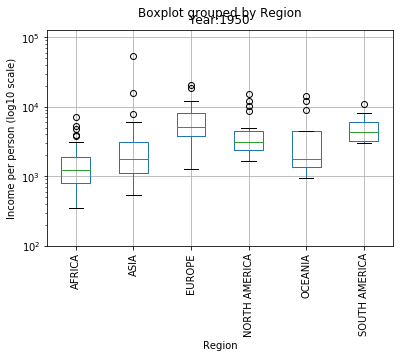

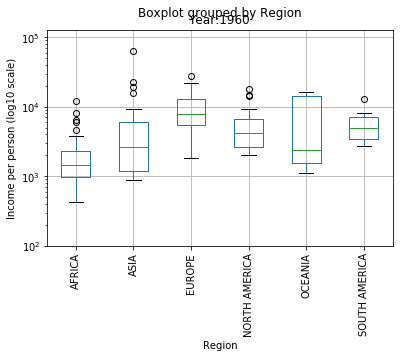

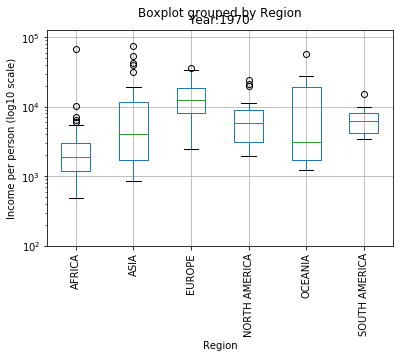

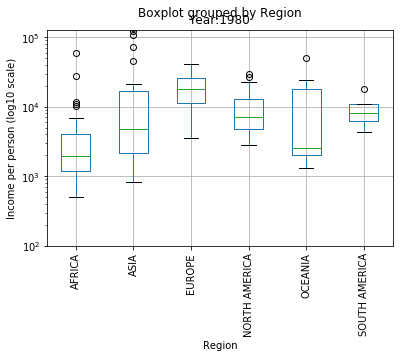

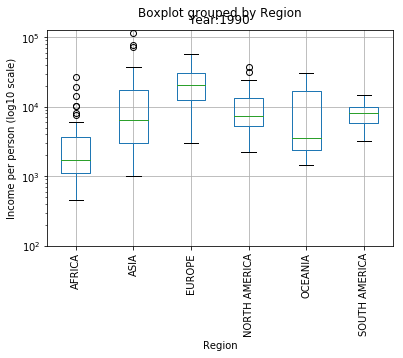

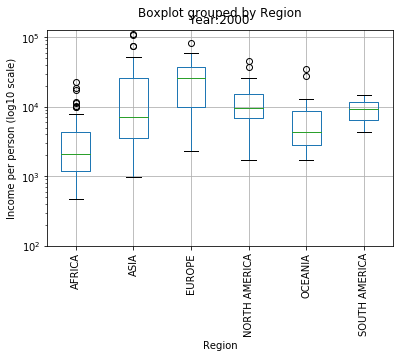

In [419]:
years = np.arange(1950, 2010, 10)
for yr in years:
    df = mergeByYear(yr)
    df.boxplot('Income' ,by = 'Region', rot = 90)
    plt.title("Year:" + str(yr))
    plt.ylabel('Income per person (log10 scale)')
    plt.ylim(10**2, 10.5 **5)
    plt.yscale('log')
    plt.show()

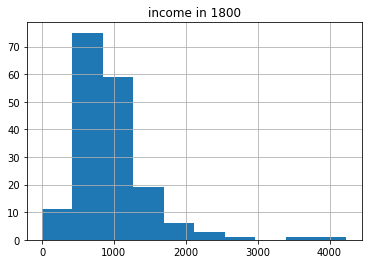

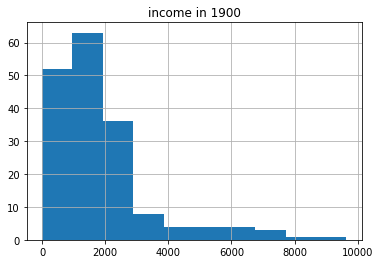

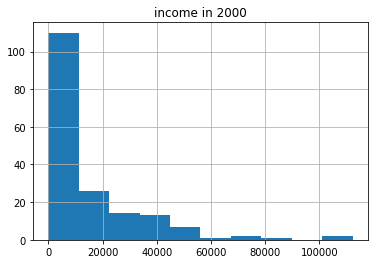

In [284]:
#your code here
years = [ 1800,1900,2000]
for year in years:
    mergeByYear(year).hist()
    plt.title("income in {}".format(year))
    plt.show()

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [424]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here
import numpy as np
from scipy.stats import norm
def show_difference(diff,a):
#    y = norm(loc=0,scale=1)
#    x = norm(loc=diff,scale=1)
    pr_x = norm.cdf(a,loc=diff,scale=1)
    pr_y = norm.cdf(a,loc=0,scale=1)
    rato = (1-pr_x)/(1-pr_y)  
    return rato

In [425]:
li=[2,3,4,5]
#your code here
for i in li:
    print('a=',i,'is',show_difference(diff=1,a=i))
#a=norm.cdf(1,2,1)
#b=norm.cdf(1,0,1)
#print(a/b)

a= 2 is 6.97381686809
a= 3 is 16.853222551
a= 4 is 42.6222008832
a= 5 is 110.486893969


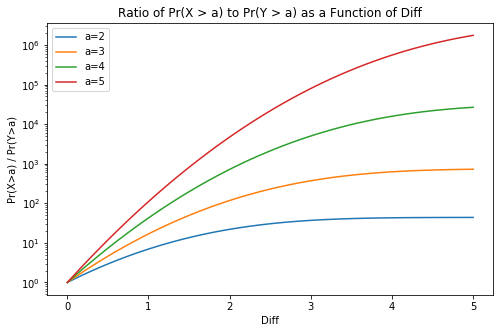

In [427]:

# let diff range from 0 to 5 
diffs = np.linspace(0, 5, 50)
a_values = range(2,6)

# Plot separate curves for 
# Pr(X > a) / Pr(Y > a) as a function of diff
# for all given values of a
plt.figure(figsize=(8,5));
for a in a_values:
    ratios = [show_difference(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)
    
# Labels
plt.legend(["a={}".format(a) for a in a_values], loc=0);
plt.xlabel('Diff');
plt.ylabel('Pr(X>a) / Pr(Y>a)');
plt.title('Ratio of Pr(X > a) to Pr(Y > a) as a Function of Diff');

# Using a log scale so you can actually see the curves
plt.yscale('log')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [436]:
db3 = mergeByYear(2012).groupby('Region', as_index=False).mean()
db3 = db3.loc[(db3.Region == "ASIA") | (db3.Region == "SOUTH AMERICA")]
db3.Income = np.round(db3.Income, 2)
db3

,Region,Income
1,ASIA,23500.43
5,SOUTH AMERICA,13015.75


/Users/xinzhao/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Income per person (dollars)')

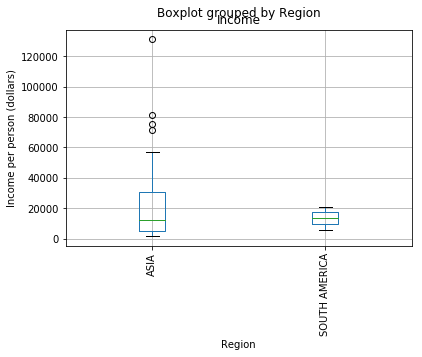

In [437]:
df = mergeByYear(2012)
df = df.loc[(df.Region == "ASIA") | (df.Region == "SOUTH AMERICA")]
df.boxplot('Income', by = 'Region', rot = 90)
plt.ylabel('Income per person (dollars)')

/Users/xinzhao/Applications/anaconda3/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


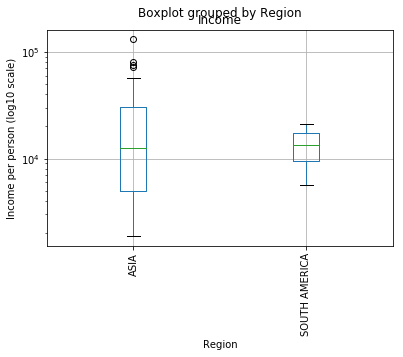

In [438]:
df = mergeByYear(2012)
df = df.loc[(df.Region == "ASIA") | (df.Region == "SOUTH AMERICA")]
df.boxplot('Income', by = 'Region', rot = 90)
plt.ylabel('Income per person (log10 scale)')
plt.yscale('log')

In [429]:
#your code here
db3= mergeByYear(2012)
F1=db3[db3.Region=='ASIA'].Income.sum()
F2=db3[db3.Region=='SOUTH AMERICA'].Income.sum()
averge_3b = F1/F2

In [430]:
averge_3b 

5.567075786387005

In [431]:
print(F1,F2)

869516.0 156189.0


In [ ]:
# OK WE KNOW AISA HAS MORE ABERAGE INCOME PER PERSON 

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [439]:
def ratioCountries(groupedData, a):
    prop = [len(group.Income[group.Income >= a]) / float(len(group.Income.dropna())) for key, group in groupedData]
    z = pd.DataFrame(groupedData.mean().index, columns = ['Region'])
    z['Mean'] = np.round(groupedData.mean().values,2)
    z['P(X > %g)' % a] = np.round(prop, 4)
    return z

df = mergeByYear(2012).groupby('Region')
df_ratio = ratioCountries(df, 1e4)
df_ratio = df_ratio[(df_ratio.Region == 'ASIA') | (df_ratio.Region == 'SOUTH AMERICA')]
df_ratio

,Region,Mean,P(X > 10000)
1,ASIA,23500.43,0.5676
5,SOUTH AMERICA,13015.75,0.7500


In [347]:
#your code here
db3[db3.income>10000].Country.count()/db3.Country.count()

0.53409090909090906

In [354]:
db3[db3.income>10000].groupby(db3.Region).count()

,Country,Region,income
Region,,,
AFRICA,10,10,10
ASIA,21,21,21
EUROPE,37,37,37
NORTH AMERICA,13,13,13
OCEANIA,4,4,4
SOUTH AMERICA,9,9,9


In [ ]:
# we can see europe have the larger number of country which income greater than 10000 dollar

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [446]:
#your code here
df.head()

,Income,Country,Region
0,1893.0,Afghanistan,ASIA
1,9811.0,Albania,EUROPE
2,12779.0,Algeria,AFRICA
3,41926.0,Andorra,EUROPE
4,7230.0,Angola,AFRICA
5,20577.0,Antigua and Barbuda,NORTH AMERICA
6,17101.0,Argentina,SOUTH AMERICA
7,7291.0,Armenia,EUROPE
8,42522.0,Australia,OCEANIA
9,44216.0,Austria,EUROPE


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 2 columns):
Region    6 non-null object
Income    6 non-null float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
